In [1]:
import numpy as np
import pandas as pd

Read data

In [2]:
months = ("january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december")

all_months = []
for i, month in enumerate(months, start=1):
    month_data = (
        pd.read_csv(f"data/{month}.csv")
        .set_index("Cadena")
        .applymap(lambda x: x.replace(",", ".").replace("%", ""))
        .drop(columns=["Media mensual"])
        .astype(float)
        .transpose()
        .assign(
            date=lambda x: pd.period_range(f"2022-{i:02}-01", periods=len(x)),
        )
        .set_index("date")
    )
    all_months.append(month_data)

df = pd.concat(all_months)

Drop missing values and normalize (make sure the share for every day add up to one).

In [3]:
df = df.dropna(axis="columns")
df = df.div(df.sum(axis=1), axis=0)

<Axes: xlabel='date'>

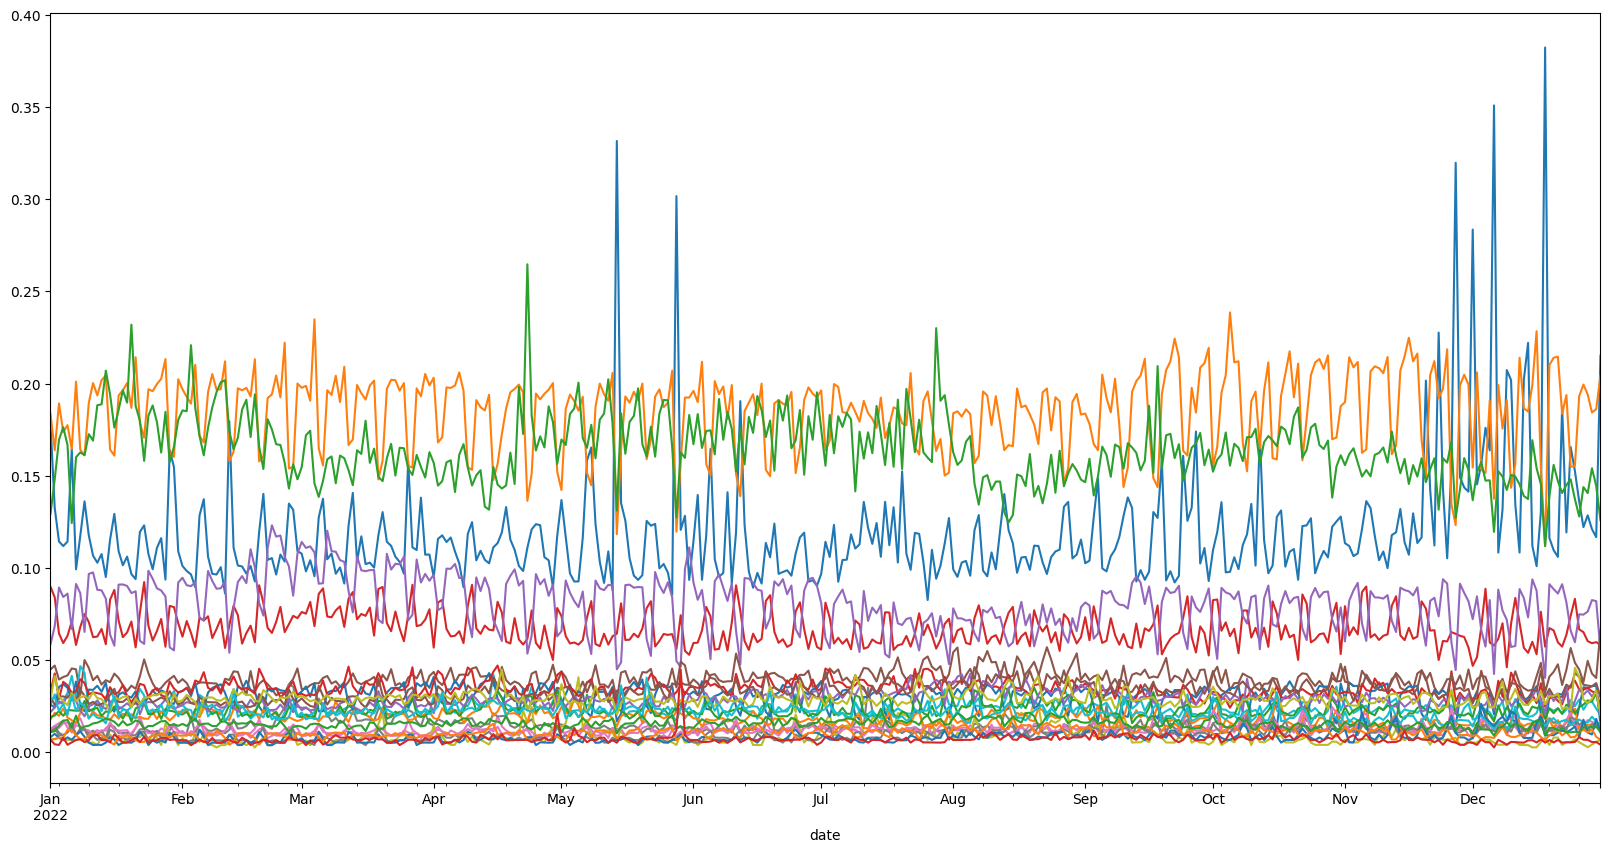

In [4]:
df.plot(legend=False, figsize=(20, 10))

In [5]:
def log_ratio(df: pd.DataFrame, base=None) -> pd.DataFrame:
    if not base:
        base = df.columns[0]
    
    out_cols = [col for col in df.columns if col != base]
    return df[out_cols].div(df[base], axis=0).apply(np.log), base

In [6]:
def inv_log_ratio(df: pd.DataFrame, base: str) -> pd.DataFrame:
    out_cols = [base] + list(df.columns)
    divisor = 1 + np.exp(df).sum(axis=1)
    df = np.exp(df).div(divisor, axis=0)
    df[base] = 1 - df.sum(axis=1)
    return df[out_cols]

In [7]:
df

Cadena,La 1,Antena 3,Telecinco,Cuatro,La Sexta,La 2,Clan,24 horas,TDP,Neox,...,Divinity,Energy,Boing,Be Mad,Trece,Paramount Network,Disney Channel,Ten,DKISS,RM TV
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.178231,0.183673,0.129252,0.089796,0.058503,0.044898,0.010884,0.012245,0.006803,0.025850,...,0.021769,0.029932,0.012245,0.010884,0.028571,0.028571,0.008163,0.006803,0.010884,0.006803
2022-01-02,0.132479,0.163818,0.148148,0.084046,0.068376,0.047009,0.014245,0.014245,0.007123,0.031339,...,0.024217,0.025641,0.014245,0.012821,0.041311,0.029915,0.009972,0.007123,0.011396,0.004274
2022-01-03,0.114323,0.189225,0.169514,0.064389,0.089356,0.039422,0.013141,0.010512,0.007884,0.026281,...,0.027595,0.030223,0.015769,0.009198,0.030223,0.022339,0.007884,0.007884,0.014455,0.003942
2022-01-04,0.111842,0.173684,0.176316,0.059211,0.084211,0.040789,0.015789,0.009211,0.006579,0.027632,...,0.026316,0.030263,0.017105,0.009211,0.027632,0.026316,0.006579,0.007895,0.017105,0.007895
2022-01-05,0.114247,0.177419,0.166667,0.063172,0.086022,0.041667,0.016129,0.010753,0.006720,0.032258,...,0.030914,0.029570,0.013441,0.010753,0.025538,0.020161,0.008065,0.012097,0.017473,0.004032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0.122117,0.199457,0.143826,0.065129,0.074627,0.037992,0.014925,0.013569,0.004071,0.023066,...,0.031208,0.036635,0.012212,0.016282,0.028494,0.016282,0.017639,0.012212,0.013569,0.006784
2022-12-28,0.128514,0.194110,0.140562,0.060241,0.076305,0.049531,0.017403,0.012048,0.002677,0.026774,...,0.033467,0.036145,0.013387,0.012048,0.026774,0.016064,0.010710,0.010710,0.013387,0.006693
2022-12-29,0.121045,0.184319,0.154058,0.059147,0.082531,0.042641,0.016506,0.012380,0.004127,0.027510,...,0.030261,0.035763,0.013755,0.015131,0.028886,0.019257,0.009629,0.012380,0.013755,0.005502


In [8]:
df_log, base = log_ratio(df)
df = inv_log_ratio(df_log, base)
df

Cadena,La 1,Antena 3,Telecinco,Cuatro,La Sexta,La 2,Clan,24 horas,TDP,Neox,...,Divinity,Energy,Boing,Be Mad,Trece,Paramount Network,Disney Channel,Ten,DKISS,RM TV
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.178231,0.183673,0.129252,0.089796,0.058503,0.044898,0.010884,0.012245,0.006803,0.025850,...,0.021769,0.029932,0.012245,0.010884,0.028571,0.028571,0.008163,0.006803,0.010884,0.006803
2022-01-02,0.132479,0.163818,0.148148,0.084046,0.068376,0.047009,0.014245,0.014245,0.007123,0.031339,...,0.024217,0.025641,0.014245,0.012821,0.041311,0.029915,0.009972,0.007123,0.011396,0.004274
2022-01-03,0.114323,0.189225,0.169514,0.064389,0.089356,0.039422,0.013141,0.010512,0.007884,0.026281,...,0.027595,0.030223,0.015769,0.009198,0.030223,0.022339,0.007884,0.007884,0.014455,0.003942
2022-01-04,0.111842,0.173684,0.176316,0.059211,0.084211,0.040789,0.015789,0.009211,0.006579,0.027632,...,0.026316,0.030263,0.017105,0.009211,0.027632,0.026316,0.006579,0.007895,0.017105,0.007895
2022-01-05,0.114247,0.177419,0.166667,0.063172,0.086022,0.041667,0.016129,0.010753,0.006720,0.032258,...,0.030914,0.029570,0.013441,0.010753,0.025538,0.020161,0.008065,0.012097,0.017473,0.004032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0.122117,0.199457,0.143826,0.065129,0.074627,0.037992,0.014925,0.013569,0.004071,0.023066,...,0.031208,0.036635,0.012212,0.016282,0.028494,0.016282,0.017639,0.012212,0.013569,0.006784
2022-12-28,0.128514,0.194110,0.140562,0.060241,0.076305,0.049531,0.017403,0.012048,0.002677,0.026774,...,0.033467,0.036145,0.013387,0.012048,0.026774,0.016064,0.010710,0.010710,0.013387,0.006693
2022-12-29,0.121045,0.184319,0.154058,0.059147,0.082531,0.042641,0.016506,0.012380,0.004127,0.027510,...,0.030261,0.035763,0.013755,0.015131,0.028886,0.019257,0.009629,0.012380,0.013755,0.005502


In [9]:
def treat_zeros(df: pd.DataFrame, thresh: float) -> pd.DataFrame:
    df = df.copy()
    m = (df < thresh).sum(axis=1)
    for idx, row in df.iterrows():
        mask = (row < thresh)
        m = mask.sum()
        S = row[~mask].sum()
        if not m:
            continue
        
        df.loc[idx] = row.mask(mask, thresh).where(mask, lambda x: (1 - thresh * m) * x / S)
  
    return df

In [10]:
from dataclasses import dataclass

@dataclass
class Params:
    X_zero: np.ndarray
    alpha: np.ndarray

@dataclass
class FittedModelData:
    n: int
    r: int
    y: np.ndarray
    params: Params
    fitted_line: np.ndarray
    errors: np.ndarray

In [11]:
from typing import Sequence
from scipy import optimize
from scipy.optimize import Bounds

def fit_local_lvl(y: np.ndarray) -> FittedModelData:
    k = 1
    n, r = y.shape
    X_zero = np.random.randn(k, r)
    alpha = np.random.randn(k)
    
    bounds = _get_bounds(X_zero, alpha)
    theta, shapes = flatten(X_zero, alpha)
    
    theta = optimize.minimize(objective, theta, (shapes, y), method="trust-constr", bounds=bounds).x
    
    X_zero, alpha = unflatten(theta, shapes)
    
    fitted_line, errors = get_fitted_line(X_zero, alpha, y)
    
    return FittedModelData(n, r, y, Params(X_zero, alpha), fitted_line, errors)

def _get_bounds(X_zero, alpha) -> Bounds:
    lb, up = zip(*([(-np.inf, np.inf)] * X_zero.size + [(0.0, 2.0)] * alpha.size))
    return Bounds(lb, up)

def flatten(*params):
    params, shapes = tuple(zip(*((np.ravel(x), x.shape) for x in params)))
    return np.concatenate(params), shapes


def unflatten(flattened_params: Sequence[np.ndarray], shapes: Sequence[int]):
    cutoffs = np.cumsum([np.product(s) for s in shapes])
    prev_cutoff = 0
    params = []
    for cutoff, shape in zip(cutoffs, shapes):
        param = flattened_params[prev_cutoff:cutoff].reshape(shape)
        prev_cutoff = cutoff
        params.append(param)
    return params

def compute_errors(X_zero: np.ndarray, alpha: np.ndarray, y: np.ndarray) -> np.ndarray:
    n = len(y)

    w = np.ones(len(X_zero))
    errors  = []
    X_prev = X_zero 
    for y_t in y:
        error = y_t - w @ X_prev
        X_prev = X_prev + alpha.reshape(-1, 1) @ error.reshape(1, -1)
        errors.append(error)

    return np.vstack(errors)

def mle_V(X_zero: np.ndarray, alpha: np.ndarray, y: np.ndarray) -> float:
    n = len(y)
    errors = compute_errors(X_zero, alpha, y)
    return sum(error @ error / n for error in errors)

def neg_loss(X_zero: np.ndarray, alpha: np.ndarray, y: np.ndarray) -> float:
    n, r = y.shape
    fst_term = n * r / 2 * np.log(2 * np.pi)
    snd_term = n / 2 * np.log(mle_V(X_zero, alpha, y))
    trd_term = n * r / 2
    return fst_term + snd_term + trd_term


def objective(flattened_params, shapes, y):
    X_zero, alpha = unflatten(flattened_params, shapes)
    return neg_loss(X_zero, alpha, y)


def get_fitted_line(X_zero: np.ndarray, alpha: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    n = len(y)
    w = np.ones(len(X_zero))
    
    fitted = []
    errors = []

    X_prev = X_zero
    for y_t in y:
        error = y_t - w @ X_prev
        fitted.append(w @ X_prev) 
        errors.append(error)

        X_prev = X_prev + alpha.reshape(-1, 1) @ error.reshape(1, -1)

    return np.vstack(fitted), np.vstack(errors)    

In [12]:
y, base = df.pipe(treat_zeros, 1e-4).pipe(log_ratio)

In [13]:
local_lvl = fit_local_lvl(y.values)

params = local_lvl.params

print("Neg loss: ", neg_loss(params.X_zero, params.alpha, local_lvl.y))
print("Errors: ", (compute_errors(params.X_zero, params.alpha, local_lvl.y) ** 2).sum())

/home/jamat/Documents/projects/compositional_ts/.venv/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Neg loss:  12030.020284677477
Errors:  696.9015790509396


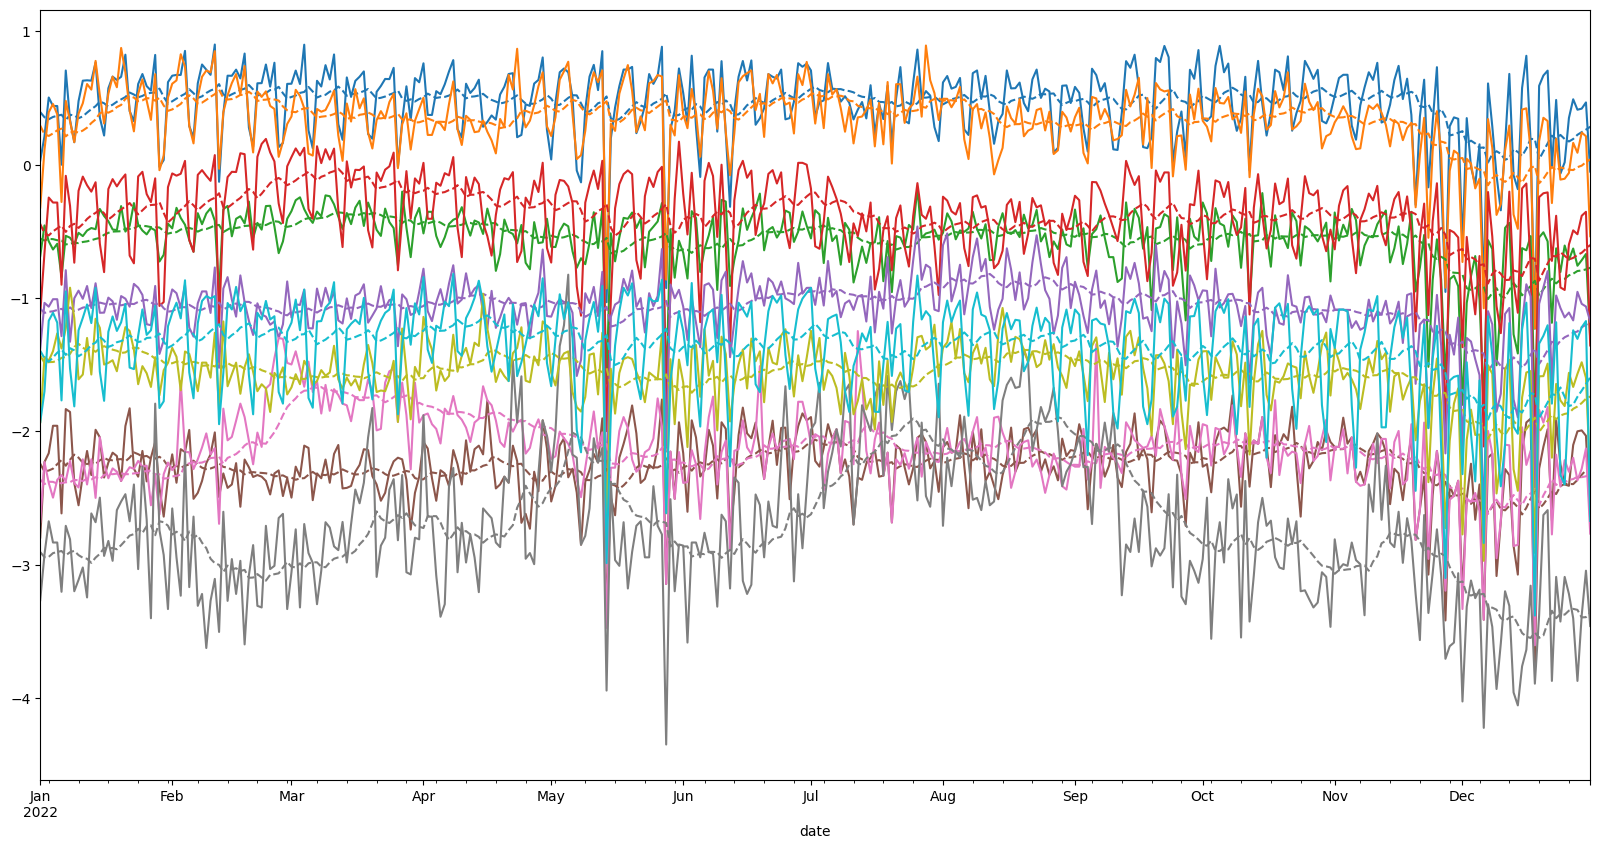

In [14]:
import matplotlib.pyplot as plt

color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

colors = [color_cycle[i % len(color_cycle)] for i in range(y.shape[1])]

for i, (name, series) in enumerate(y.iloc[:, :10].items()):
    color = colors[i]
    series.plot(color=color, figsize=(20, 10))
    pd.Series(local_lvl.fitted_line[:, i], index=series.index).plot(color=color, linestyle="--")

In the case of local level model, the forecasts will be constant.

In [15]:
from dataclasses import dataclass

@dataclass
class Params:
    l_zero: np.ndarray
    b_zero: np.ndarray
    alpha: np.ndarray
    beta: np.ndarray
        
@dataclass
class FittedModelData:
    n: int
    r: int
    y: np.ndarray
    params: Params
    fitted_line: np.ndarray
    errors: np.ndarray

In [16]:
from typing import Sequence
from scipy import optimize
from scipy import linalg
from scipy.optimize import Bounds, LinearConstraint

def fit_local_trend(y: np.ndarray) -> FittedModelData:
    n, r = y.shape
    
    l_zero = np.random.randn(r)
    b_zero = np.random.randn(r)

    alpha = np.random.uniform(0, 1, 1)
    beta = np.random.uniform(0, 1, 1)
    
    constraint = get_constraints(l_zero, b_zero, alpha, beta)
    bounds = get_bounds(l_zero, b_zero, alpha, beta)
    
    theta, shapes = flatten(l_zero, b_zero, alpha, beta)
    
    theta = optimize.minimize(objective, theta, (shapes, y), method="trust-constr", bounds=bounds, constraints=[constraint]).x
    
    l_zero, b_zero, alpha, beta = unflatten(theta, shapes)
    
    fitted_line, errors = get_fitted_line(l_zero, b_zero, alpha, beta, y)
    
    return FittedModelData(n, r, y, Params(l_zero, b_zero, alpha, beta), fitted_line, errors)

def compute_errors(X_zero: np.ndarray, g: np.ndarray, y: np.ndarray) -> np.ndarray:
    n = len(y)
    assert X_zero.shape[1] == y.shape[1]
    
    w = np.ones(2)
    F = np.array([[1, 1], [0, 1]])
        
    errors  = []
    
    X_prev = X_zero 
    for y_t in y:
        error = y_t - w @ X_prev
        X_prev = F @ X_prev + g @ error.reshape(1, -1)
        errors.append(error)

    return np.vstack(errors)

def mle_V(X_zero: np.ndarray, g: np.ndarray, y: np.ndarray) -> float:
    n = len(y)
    errors = compute_errors(X_zero, g, y)
    return sum(error @ error / n for error in errors)

def neg_loss(X_zero: np.ndarray, g: np.ndarray, y: np.ndarray) -> float:
    n, r = y.shape
    fst_term = n * r / 2 * np.log(2 * np.pi)
    snd_term = n / 2 * np.log(mle_V(X_zero, g, y))
    trd_term = n * r / 2
    return fst_term + snd_term + trd_term


def objective(flattened_params, shapes, y):
    l_zero, b_zero, alpha, beta = unflatten(flattened_params, shapes)
    X_zero = np.vstack((l_zero, b_zero))
    g = np.vstack((alpha, beta))
    return neg_loss(X_zero, g, y)


def get_fitted_line(l_zero: np.ndarray, b_zero: np.ndarray, alpha: np.ndarray, beta: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    n = len(y)
    
    X_zero = np.vstack((l_zero, b_zero))
    g = np.vstack((alpha, beta))
    
    w = np.ones(len(X_zero))
    F = np.array([[1, 1], [0, 1]])
    
    errors = []
    fitted = []
    
    X_prev = X_zero
    for y_t in y:
        error = y_t - w @ X_prev
        fitted.append(w @ X_prev) 
        errors.append(error)

        X_prev = F @ X_prev + g.reshape(-1, 1) @ error.reshape(1, -1)

    return np.vstack(fitted), np.vstack(errors)

def get_constraints(l_zero, b_zero, alpha, beta) -> LinearConstraint:
    X_zero_size = l_zero.size + b_zero.size
    A = linalg.block_diag(np.eye(X_zero_size), np.array([[2, 1], [0, 1]]))
    ub = np.array([np.inf] * X_zero_size + [4.0] + [np.inf])
    return LinearConstraint(A, ub=ub)

def get_bounds(l_zero, b_zero, alpha, beta) -> Bounds:
    lb, up = zip(*[(-np.inf, np.inf)] * (l_zero.size + b_zero.size) + [(0.0, np.inf), (0.0, np.inf)])
    return Bounds(lb, up)

In [17]:
local_trend = fit_local_trend(y.values)

params = local_trend.params

/home/jamat/Documents/projects/compositional_ts/.venv/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


In [18]:
params

Params(l_zero=array([ 0.40041654,  0.30433127, -0.54611126, -0.43550979, -1.07609723,
       -2.23968674, -2.3602601 , -2.89128474, -1.42165399, -1.38469107,
       -1.81007731, -1.72360074, -1.26395829, -1.56397655, -1.43940803,
       -2.24725499, -2.53033645, -1.40510603, -1.61354934, -2.86042379,
       -2.70326407, -2.11228083, -3.00897248]), b_zero=array([-4.26769704e-04, -9.13245776e-04, -7.95326058e-04, -6.90686234e-04,
       -3.10937745e-04, -1.90852984e-04, -7.16917365e-06, -1.33528279e-03,
       -1.07560271e-03, -9.08985364e-04, -1.19929939e-03, -1.78032205e-04,
       -7.34338784e-04, -1.60189540e-04,  3.71951410e-05, -2.44848539e-04,
        5.15040429e-04, -5.99752879e-04, -1.53843710e-03,  1.02567872e-03,
       -5.57045703e-05, -9.24518365e-04, -6.47037031e-04]), alpha=array([0.10445993]), beta=array([8.24438119e-08]))

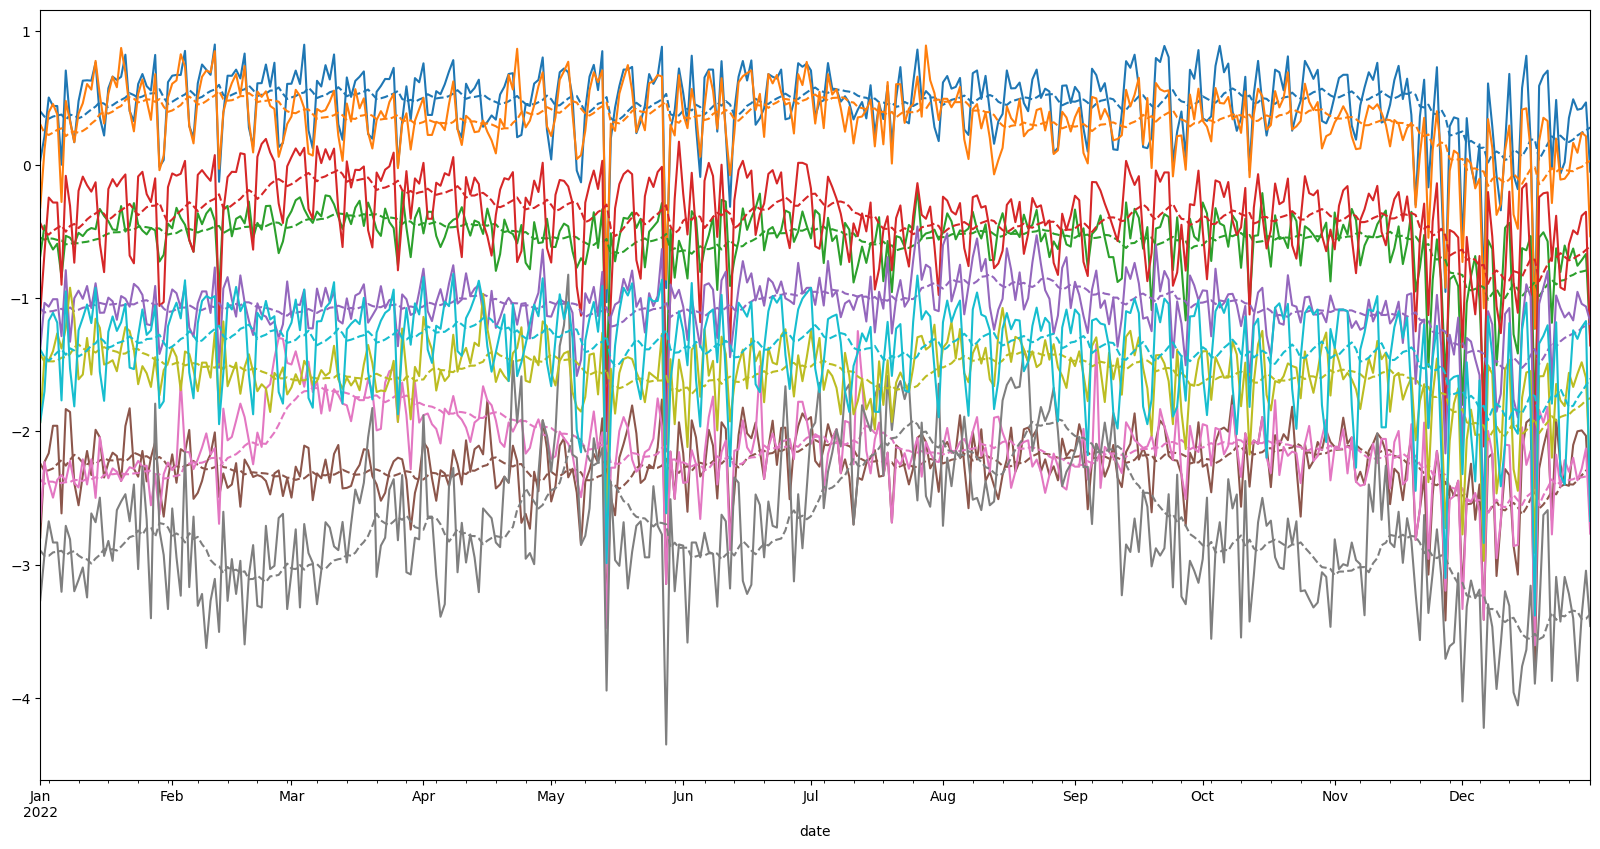

In [19]:
import matplotlib.pyplot as plt

color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

colors = [color_cycle[i % len(color_cycle)] for i in range(y.shape[1])]

for i, (name, series) in enumerate(y.iloc[:, :10].items()):
    color = colors[i]
    series.plot(color=color, figsize=(20, 10))
    pd.Series(local_trend.fitted_line[:, i], index=series.index).plot(color=color, linestyle="--")

In [20]:
X_zero = np.vstack((params.l_zero, params.b_zero))
g = np.vstack((params.alpha, params.beta))

print("Neg loss: ", neg_loss(X_zero, g, local_trend.y))
print("Errors: ", (compute_errors(X_zero, g, local_trend.y) ** 2).sum())

Neg loss:  12029.910666293676
Errors:  696.4831117270354


Plot time series after reverting the log transform:

In [21]:
fitted = pd.DataFrame(local_trend.fitted_line, index=y.index, columns=y.columns).pipe(inv_log_ratio, base)

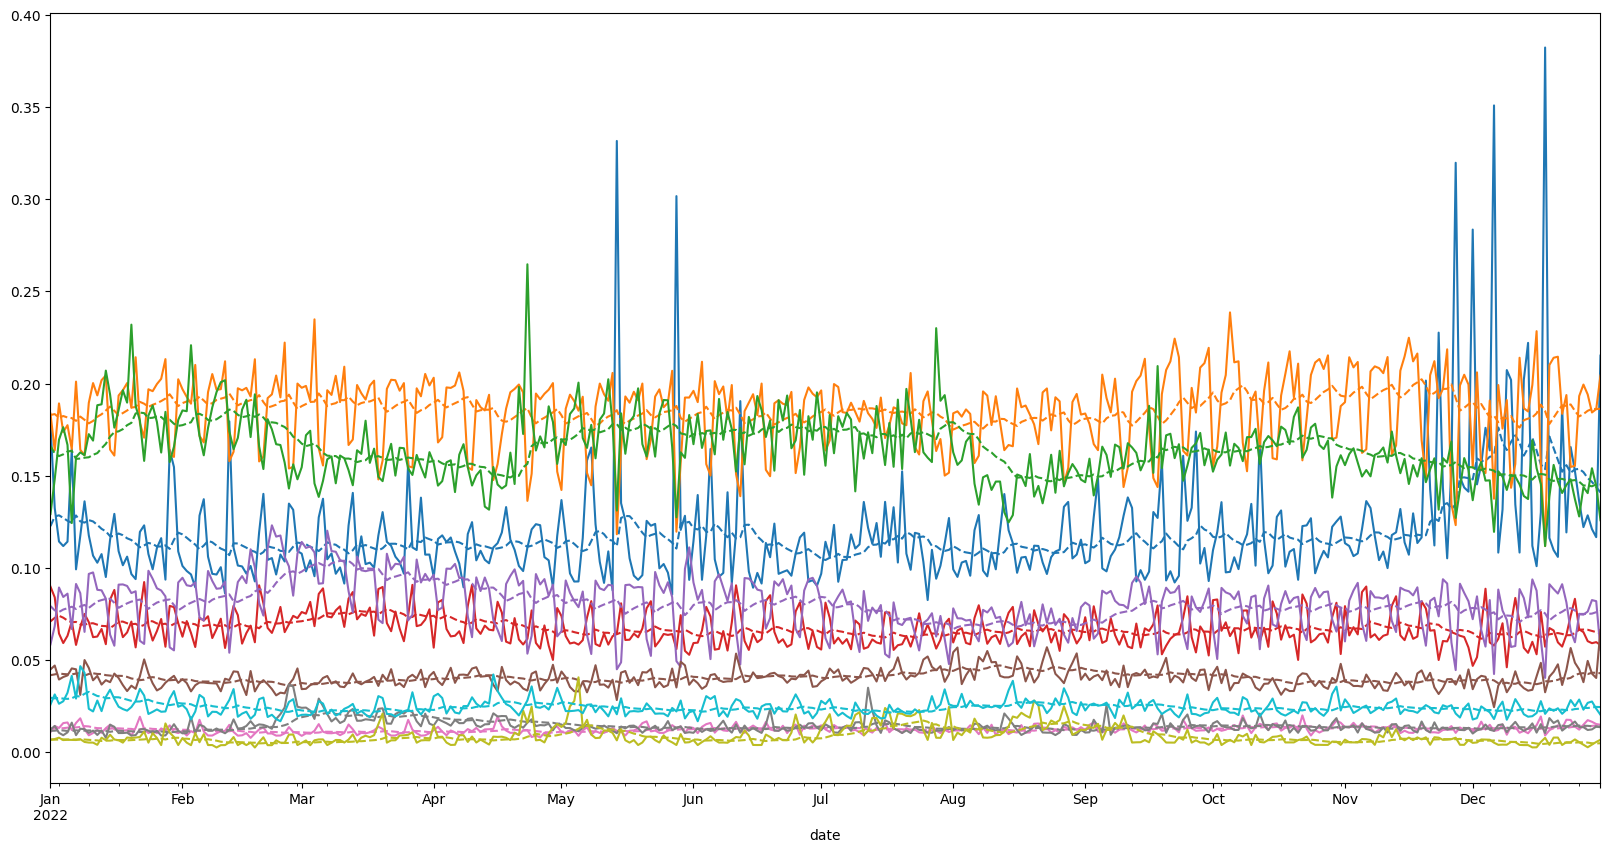

In [22]:
import matplotlib.pyplot as plt

color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

colors = [color_cycle[i % len(color_cycle)] for i in range(y.shape[1])]

for i, (name, series) in enumerate(df.iloc[:, :10].items()):
    color = colors[i]
    series.plot(color=color, figsize=(20, 10))
    fitted.iloc[:, i].plot(color=color, linestyle="--")

Forecasting (TODO)